To run this code, set up a conda environment as follows:

```
conda create --name hackathon  
conda activate hackathon  
conda install python=3.9  
conda install -c conda-forge ipyleaflet jupyterlab netCDF4 matplotlib  
```

If you wish to run it from Jupyter Lab, run the following lines in the BlueCloudHackathon_i folder:

```
conda activate hackathon  
jupyter lab
```

(Jupyter Lab will start in your browser)

In [1]:
from ipyleaflet import * # Map, basemaps, ImageOverlay, LayersControl, Popup
from ipywidgets import HTML, Layout, SelectionSlider, RadioButtons
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
layer1_p = "data//00483_25794_00001.nc"
# layer1_p = "../Blue-Cloud Data Pool/MED-mixed_layer_depth-483/download_1/00483_25794_00001.nc"
layer1_d = nc.Dataset(layer1_p)
#for var in layer1_d.variables.values():
#for var in layer1_d.variables:
#    print(var)

In [3]:
data_dummy = np.array(layer1_d["Mixed_Layer_Depth"][0, :, :], dtype=np.float64)
data_dummy[data_dummy>1e+30] = np.nan #because it is a masked array

lons = np.array(layer1_d["lon"][:], dtype=np.float64)
lats = np.array(layer1_d["lat"][:], dtype=np.float64)

print(data_dummy.shape)
print(lons.shape)
print(lats.shape)
#print("Lons: ", lons)
#print("Lats: ", lats)

(129, 367)
(367,)
(129,)


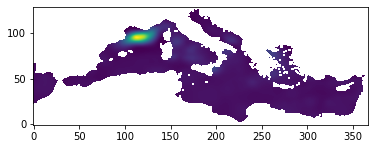

In [4]:
plt.imshow(data_dummy, origin="lower")
plt.imsave(fname="data_dummy1.png", arr=np.flipud(data_dummy), 
    vmin=np.nanmin(data_dummy), vmax=np.nanmax(data_dummy), 
    dpi=150, cmap="viridis")
plt.imsave(fname="data_dummy2.png", arr=np.flipud(data_dummy), 
    vmin=np.nanmin(data_dummy), vmax=np.nanmax(data_dummy), 
    dpi=150, cmap="magma")
plt.imsave(fname="data_dummy3.png", arr=np.flipud(data_dummy), 
    vmin=np.nanmin(data_dummy), vmax=np.nanmax(data_dummy), 
    dpi=150, cmap="Blues")

In [5]:
defaultLayout=Layout(width='1000px', height='800px')
center=(35,20)
m = Map(center=center,
       #basemap=basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2022-01-01"),
       basemap=basemaps.Gaode.Satellite,
        zoom=4,
       layout=defaultLayout)
image1 = ImageOverlay(
    url="data_dummy1.png",
    bounds=((np.min(lats), np.min(lons)), (np.max(lats), np.max(lons))),
    name="viridis"
)
image2 = ImageOverlay(
    url="data_dummy2.png",
    bounds=((np.min(lats), np.min(lons)), (np.max(lats), np.max(lons))),
    name="magma"
)
image3 = ImageOverlay(
    url="data_dummy3.png",
    bounds=((np.min(lats), np.min(lons)), (np.max(lats), np.max(lons))),
    name="Blues"
)

m.add_layer(image1)
m.add_layer(image2)
m.add_layer(image3)

control = LayersControl(position='topright')
m.add_control(control)

#marker = Marker(location=center, draggable=True)
#m.add_layer(marker)

In [6]:
def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        #m.add_layer(Marker(location=kwargs.get('coordinates')))
        #print("You clicked on: ", kwargs.get('coordinates'))
        
        x, y = kwargs.get('coordinates')
        idx = (np.abs(lats-x)).argmin()
        idy = (np.abs(lons-y)).argmin()
        #print(idx, idy)
        val_mixed_layer_depth = data_dummy[idx,idy]
        #print("Mixed layer depth: ", val_mixed_layer_depth)
        message1 = HTML()
        message1.value = f"Coordinates: ({np.round(x,2)}, {np.round(y,2)}) <br> Mixed layer depth: {np.round(val_mixed_layer_depth, 2)} m <br> <img src='dummy-graph.png' width='400'/>"
        # message1.value = f"Coordinates: ({np.round(x,2)}, {np.round(y,2)}) <br> Mixed layer depth: {np.round(val_mixed_layer_depth, 2)} m <br> <img src='/user/tamaradjerdj/files/workspace/ipyleaflet_test/dummy-graph.png' width='400'/>"
        popup = Popup(
            location=(x, y),
            child=message1,
            close_button=True,
            auto_close=True,
            close_on_escape_key=True,
            max_width = 400,
            name = "Location info"
        )
        m.add_layer(popup)

m.on_interaction(handle_click)

In [7]:
m

Map(center=[35, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…